# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [133]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
import matplotlib.pyplot as plt
import pandas as pd

In [134]:
browser = Browser('firefox')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [135]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [136]:
# Create a Beautiful Soup Object

html = browser.html

weather_soup = soup(html, 'html.parser')

In [137]:
# Extract all rows of data

weather_table = weather_soup.find('table', class_='table')

rows = weather_table.find_all('tr', class_='data-row')

print(weather_table)

<table class="table">
<tbody><tr>
<th>id</th>
<th>terrestrial_date</th>
<th>sol</th>
<th>ls</th>
<th>month</th>
<th>min_temp</th>
<th>pressure</th>
</tr>
<tr class="data-row">
<td>2</td>
<td>2012-08-16</td>
<td>10</td>
<td>155</td>
<td>6</td>
<td>-75.0</td>
<td>739.0</td>
</tr>
<tr class="data-row">
<td>13</td>
<td>2012-08-17</td>
<td>11</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>24</td>
<td>2012-08-18</td>
<td>12</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>741.0</td>
</tr>
<tr class="data-row">
<td>35</td>
<td>2012-08-19</td>
<td>13</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>732.0</td>
</tr>
<tr class="data-row">
<td>46</td>
<td>2012-08-20</td>
<td>14</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>57</td>
<td>2012-08-21</td>
<td>15</td>
<td>158</td>
<td>6</td>
<td>-78.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>68</td>
<td>2012-08-22</td>
<td>16</td>
<td>158</td>
<td>6</td>
<

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [138]:
# Create an empty list

data_rows = []

# Loop through the scraped data to create a list of rows

for row in rows:
    cells = row.find_all('td')
    row_data = [cell.get_text() for cell in cells]

    data_rows.append(row_data)

In [139]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names

# define column names
column_names = ['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']

# create the df
df = pd.DataFrame(data_rows, columns=column_names)


In [140]:
# Confirm DataFrame was created successfully

print(df.head())

   id terrestrial_date sol   ls month min_temp pressure
0   2       2012-08-16  10  155     6    -75.0    739.0
1  13       2012-08-17  11  156     6    -76.0    740.0
2  24       2012-08-18  12  156     6    -76.0    741.0
3  35       2012-08-19  13  157     6    -74.0    732.0
4  46       2012-08-20  14  157     6    -74.0    740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [141]:
# Examine data type of each column

# Check the data types of each column
column_types = df.dtypes
print(column_types)


id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object


In [142]:
# Change data types for data analysis

# Convert 'id', 'sol', 'ls', and 'month' to integers
df['id'] = df['id'].astype(int)
df['sol'] = df['sol'].astype(int)
df['ls'] = df['ls'].astype(int)
df['month'] = df['month'].astype(int)

# Convert 'terrestrial_date' to datetime
df['terrestrial_date'] = pd.to_datetime(df['terrestrial_date'])

# Convert 'min_temp' and 'pressure' to floats
df['min_temp'] = df['min_temp'].astype(float)
df['pressure'] = df['pressure'].astype(float)

# Check the new data types
print(df.dtypes)


id                           int64
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [143]:
# 1. How many months are there on Mars?

mars_months = df['month'].nunique()
print(f"Number of Martian months: {mars_months}")


Number of Martian months: 12


In [144]:
# Count the number of Martian days (sols) for each month
days_per_month = df.groupby('month')['sol'].count()

# Print the result
# print(f"Martian months (including # of sdays_per_month)
print("\nMartian months and sols (days):\n", days_per_month)


Martian months and sols (days):
 month
1     174
2     178
3     192
4     194
5     149
6     147
7     142
8     141
9     134
10    112
11    138
12    166
Name: sol, dtype: int64


In [145]:
# 2. How many Martian days' worth of data are there?

martian_days = df['sol'].nunique()
print(f"Total number of Martian sols in the dataset: {martian_days}")


Total number of Martian sols in the dataset: 1867


In [146]:
# 3. What is the average low temperature by month?
# Group the data by month
grouped_by_month = df.groupby('month')

# Calculate the count of Martian days and the average low temperature for each month
avg_low_temp_by_month = grouped_by_month['min_temp'].mean()

# Printing the results
print("\nAverage low temperature per Martian month:\n", avg_low_temp_by_month)



Average low temperature per Martian month:
 month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64


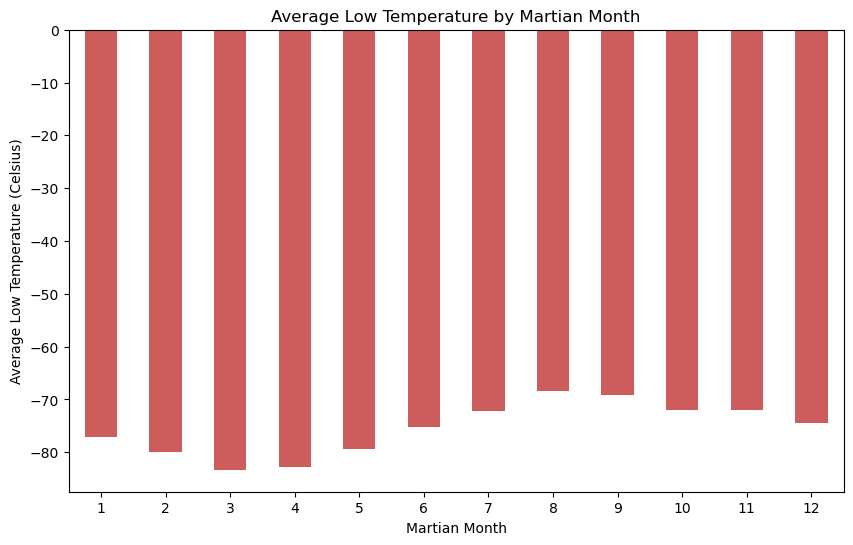

In [147]:
# Plotting the average low temperature by month
avg_low_temp_by_month.plot(kind='bar', color='indianred', figsize=(10, 6))

# Setting the title and labels
plt.title('Average Low Temperature by Martian Month')
plt.xlabel('Martian Month')
plt.ylabel('Average Low Temperature (Celsius)')
plt.xticks(rotation=0)

# Display the plot
plt.show()


In [148]:
# Identify the coldest and hottest months in Curiosity's location

# Sorting the average temperatures in ascending order to find the coldest month
sorted_temps_asc = avg_low_temp_by_month.sort_values()
coldest_month = sorted_temps_asc.index[0]
coldest_temp = sorted_temps_asc.iloc[0]

warmest_month = sorted_temps_asc.index[-1]
warmest_temp = sorted_temps_asc.iloc[-1]

def celsius_to_fahrenheit(celsius_temp):
    return (celsius_temp * 9/5) + 32

print(f"Coldest Martian month: Month {coldest_month} with an average low temperature of {coldest_temp:.2f} Celsius or {celsius_to_fahrenheit(coldest_temp):.2f} Fahrenheit")
print(f"Hottest Martian month: Month {warmest_month} with an average low temperature of {warmest_temp:.2f} Celsius or {celsius_to_fahrenheit(warmest_temp):.2f} Fahrenheit")


Coldest Martian month: Month 3 with an average low temperature of -83.31 Celsius or -117.95 Fahrenheit
Hottest Martian month: Month 8 with an average low temperature of -68.38 Celsius or -91.09 Fahrenheit


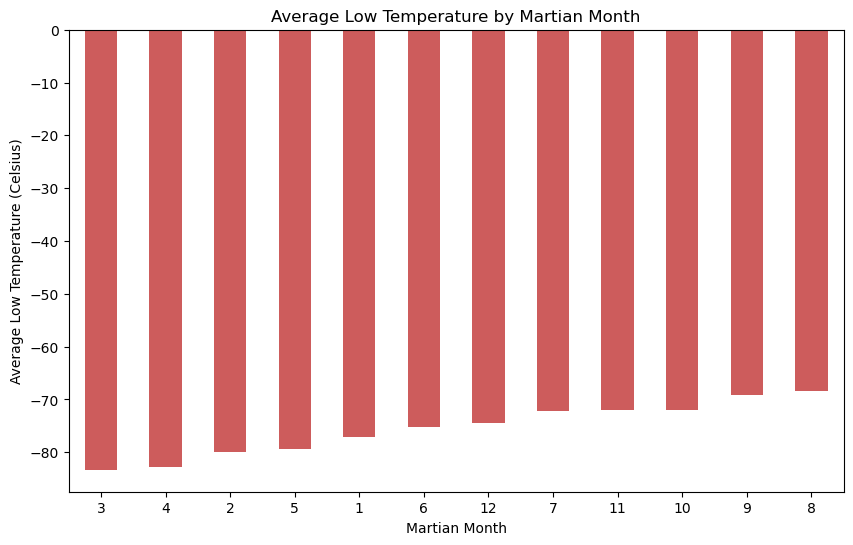

In [149]:
sorted_temps_asc.plot(kind='bar', color='indianred', figsize=(10, 6))

# Setting the title and labels
plt.title('Average Low Temperature by Martian Month')
plt.xlabel('Martian Month')
plt.ylabel('Average Low Temperature (Celsius)')
plt.xticks(rotation=0)

# Display the plot
plt.show()

In [150]:
# 4. Average pressure by Martian month

avg_pressure_by_month = grouped_by_month['pressure'].mean()

print("\nAverage atmospheric pressure per Martian month:\n", avg_pressure_by_month)


Average atmospheric pressure per Martian month:
 month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64


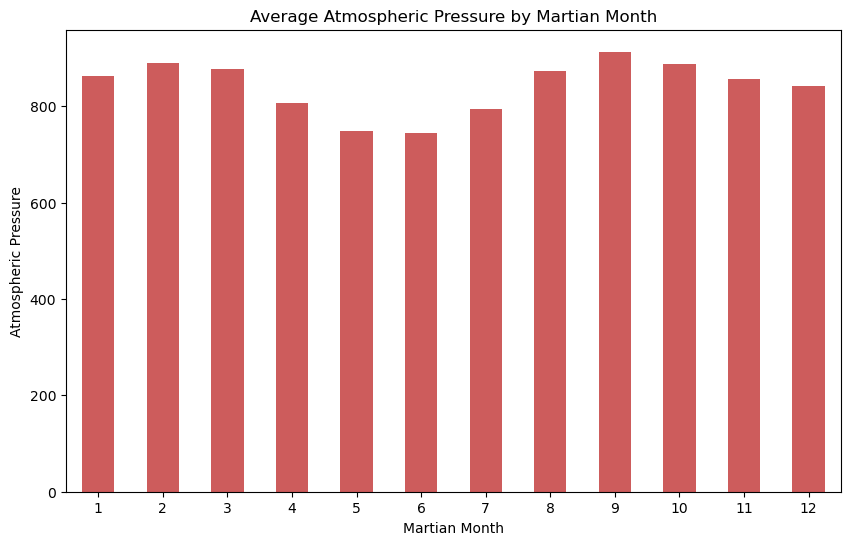

In [151]:
# Plot the average pressure by month
avg_pressure_by_month.plot(kind='bar', color='indianred', figsize=(10, 6))

# Setting the title and labels
plt.title('Average Atmospheric Pressure by Martian Month')
plt.xlabel('Martian Month')
plt.ylabel('Atmospheric Pressure')
plt.xticks(rotation=0)

# Display the plot
plt.show()

In [152]:
# range of Earth dates
terrestrial_date_range = df['terrestrial_date'].max() - df['terrestrial_date'].min()
print(f"Date range in the dataset: {terrestrial_date_range.days} Earth days")

# number of Martian sols covered
num_sols = df['sol'].max() - df['sol'].min()
print(f"Number of Martian sols covered in the dataset: {num_sols}")

# rough approximation of 
earth_days_per_martian_year = 687  # Known average value
martian_year_coverage_ratio = num_sols / earth_days_per_martian_year
estimated_earth_days_covered = terrestrial_date_range.days / martian_year_coverage_ratio
print(f"Estimated number of Earth days in a Martian year: {estimated_earth_days_covered:.0f}")


Date range in the dataset: 2021 Earth days
Number of Martian sols covered in the dataset: 1967
Estimated number of Earth days in a Martian year: 706


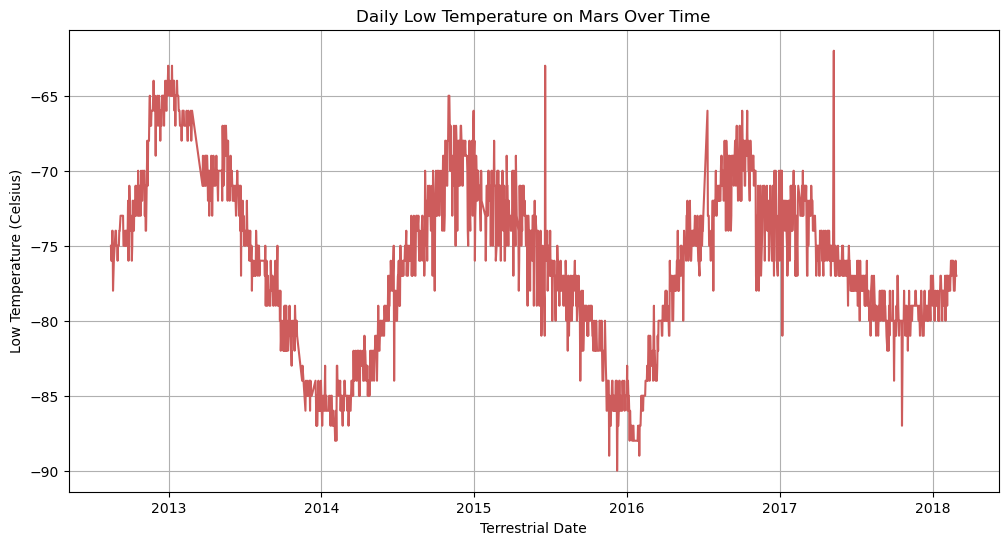

In [153]:
# plot avg low temp against martian days to try to detect a cycle

plt.figure(figsize=(12, 6))
plt.plot(df['terrestrial_date'], df['min_temp'], linestyle='-', color='indianred')
plt.title('Daily Low Temperature on Mars Over Time')
plt.xlabel('Terrestrial Date')
plt.ylabel('Low Temperature (Celsius)')
plt.grid(True)
plt.show()


On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [154]:
# Write the DataFrame to a CSV file

df.to_csv('mars_weather_data.csv', index=False)


In [155]:
browser.quit()